MECSim plotter for ``EC_Model.tvc`` and ``EC_Model.fin``
-----

Plot current and all surface concentrations against time from the data in ``EC_Model.tvc``.

Plot all concentrations (scaled units) against the distance from the electrode surface for the final timestep (``EC_Model.fin``).

Use MECSimPlotter for CV plots.

In [1]:
# import required python packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load MECSim output file
def ReadMECSimFile(filename):
    f = open(filename, 'r')
    time = []
    eapp = []
    current = []
    conc = []
    i = 0
    for line in f:
        i += 1
        if(i==1): 
            concnumber = int(line)
            for j in range(concnumber):
                conc.append([])
        else: # remove the number of species line
            columns = line.split()
            time.append(float(columns[0]))
            eapp.append(float(columns[1]))
            current.append(float(columns[2]))
            for j in range(concnumber):
                conc[j].append(columns[3+j])
    return concnumber, np.asfarray(time), np.asfarray(current), np.asfarray(eapp), np.asfarray(conc)

# load MECSim *.fin file with final snapshot of concentrations against distance from electrode
def ReadMECSimFin(filename, concnumber = 2):
    f = open(filename, 'r')
    x = []
    concfin = []
    for j in range(concnumber):
        concfin.append([])
    i = 0
    for line in f:
        columns = line.split()
        x.append(float(columns[0]))
        for j in range(concnumber):
            concfin[j].append(columns[1+j])
    return x, concfin

In [3]:
concnumber, time, current, eapp, conc = ReadMECSimFile('EC_Model.tvc')
x, concfin = ReadMECSimFin('EC_Model.fin', concnumber)

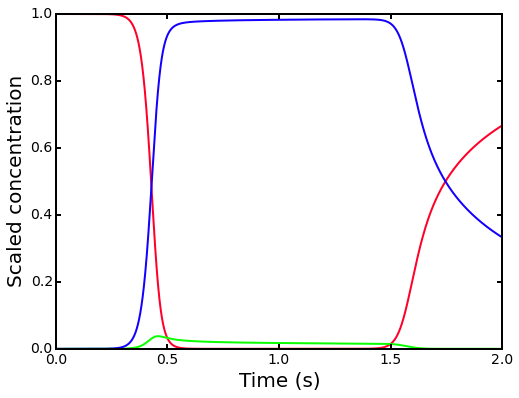

In [4]:
plt.figure(figsize=(8,6),dpi=100)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
for i in range(concnumber):
    plt.plot(time, conc[i], color = plt.cm.gist_rainbow(i*100))
plt.xlim([0,time[-1]])
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Scaled concentration', fontsize=20)
plt.savefig('MECSimOutputConcT.png')
plt.savefig('MECSimOutputConcT.ps')
plt.savefig('MECSimOutputConcT.pdf')

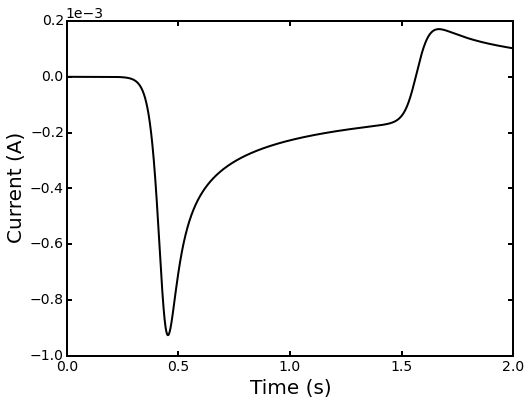

In [5]:
plt.figure(figsize=(8,6),dpi=100)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.plot(time, current, color = 'k')
plt.xlim([0,time[-1]])
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Current (A)', fontsize=20)
plt.savefig('MECSimOutputCt.png')
plt.savefig('MECSimOutputCt.ps')
plt.savefig('MECSimOutputCt.pdf')

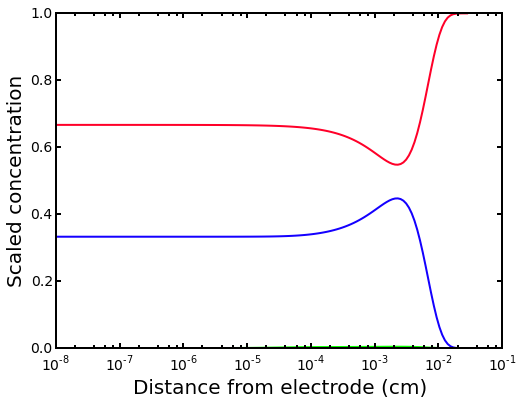

In [6]:
plt.figure(figsize=(8,6),dpi=100)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
for i in range(concnumber):
    plt.plot(x, concfin[i], color = plt.cm.gist_rainbow(i*100))
plt.xlabel('Distance from electrode (cm)', fontsize=20)
plt.xscale('log')
plt.ylabel('Scaled concentration', fontsize=20)
plt.savefig('MECSimOutputConcX.png')
plt.savefig('MECSimOutputConcX.ps')
plt.savefig('MECSimOutputConcX.pdf')